In [2]:
# IMPORT PACKAGES
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# IMPORT DATA
stardf = pd.read_csv("D:\KaggleData\Data\stars.csv")

In [3]:
# LOOK AT FIRST 5 ROWS OF DATA AND LAST 5 ROWS OF DATA
print(stardf.head())
print(stardf.tail())

   Temperature    L     R    A_M Color Spectral_Class  Type
0       3068.0  0.0  0.17  16.12   Red              M   0.0
1       3042.0  0.0  0.15  16.60   Red              M   0.0
2       2600.0  0.0  0.10  18.70   Red              M   0.0
3       2800.0  0.0  0.16  16.65   Red              M   0.0
4       1939.0  0.0  0.10  20.06   Red              M   0.0
     Temperature         L       R    A_M  Color Spectral_Class  Type
235      38940.0  374830.0  1356.0  -9.93   Blue              O   5.0
236      30839.0  834042.0  1194.0 -10.63   Blue              O   5.0
237       8829.0  537493.0  1423.0 -10.73  White              A   5.0
238       9235.0  404940.0  1112.0 -11.23  White              A   5.0
239      37882.0  294903.0  1783.0  -7.80   Blue              O   5.0


In [4]:
# CHECK DATA TYPES
print(stardf.dtypes)

Temperature       float64
L                 float64
R                 float64
A_M               float64
Color              object
Spectral_Class     object
Type              float64
dtype: object


In [5]:
# TOTAL ROWS AND COLUMNS
print(stardf.shape)

(240, 7)


In [6]:
# CHECK FOR DUPLICATE ROWS
duplicatedf = stardf[stardf.duplicated()]
print("Number of duplicate rows:", duplicatedf.shape)
# NO DUPLICATES

# CHECK FOR MISSING OR NULL VALUES
print(stardf.isnull().sum())
# NO MISSING VALUES

Number of duplicate rows: (0, 7)
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64


In [7]:
# CONVERT COLOR AND SPECTRAL CLASS TO NUMBERS
print(stardf['Color'].unique())
print(stardf['Spectral_Class'].unique())

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [8]:
color_mapping = {
    'Red': 0,
    'Blue White': 1,
    'White': 2,
    'Yellowish White': 3,
    'Blue white': 1,
    'Pale yellow orange': 4,
    'Blue': 5,
    'Blue-white': 1,
    'Whitish': 2,
    'yellow-white': 3,
    'Orange': 6,
    'White-Yellow': 3,
    'white': 2,
    'yellowish': 7,
    'Yellowish': 7,
    'Orange-Red': 8,
    'Blue-White': 1,
}

stardf.Color = [color_mapping[item] for item in stardf.Color]

class_mapping = {
    'M': 0,
    'B': 1,
    'A': 2,
    'F': 3,
    'O': 4,
    'K': 5,
    'G': 6,
}

stardf.Spectral_Class = [class_mapping[item] for item in stardf.Spectral_Class]

In [9]:
# TAKE OUT NON NUMERICAL DATA
stardf1 = stardf.drop(['Color'], axis=1)
stardf2 = stardf1.drop(['Spectral_Class'], axis=1)

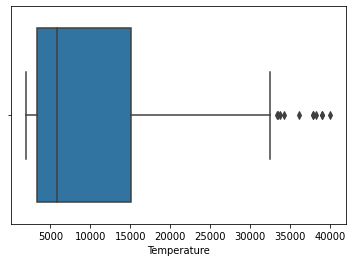

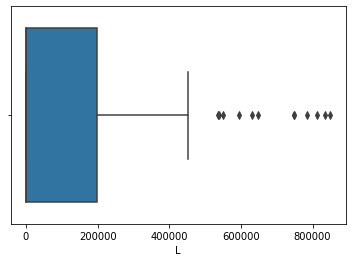

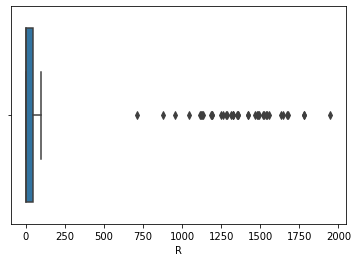

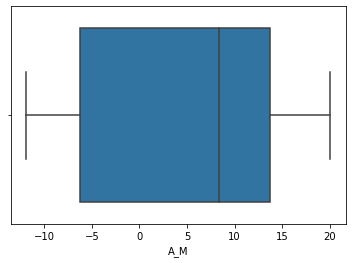

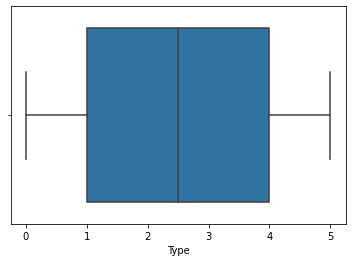

In [10]:
# CREATE A BOXPLOT FOR EACH COLUMN
sns.boxplot(x=stardf2['Temperature'])
plt.show()

sns.boxplot(x=stardf2['L'])
plt.show()

sns.boxplot(x=stardf2['R'])
plt.show()

sns.boxplot(x=stardf2['A_M'])
plt.show()

sns.boxplot(x=stardf2['Type'])
plt.show()

In [11]:
# SET BIN ARGUMENT
n_obs = len(stardf2)

n_bins = round(np.sqrt(n_obs), 0)

print(n_bins)

15.0


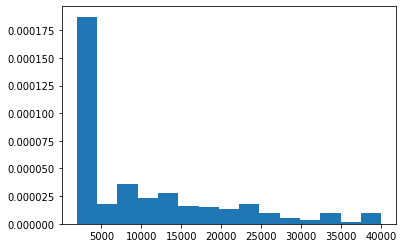

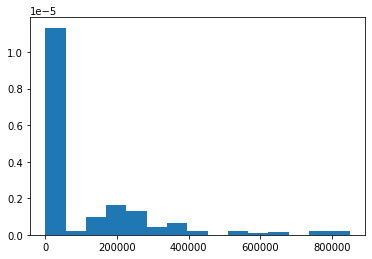

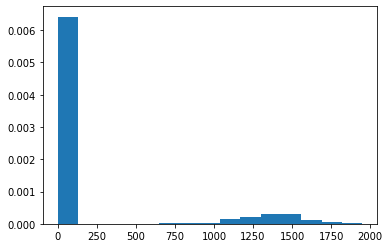

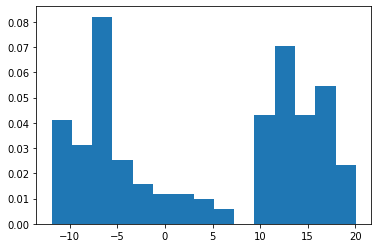

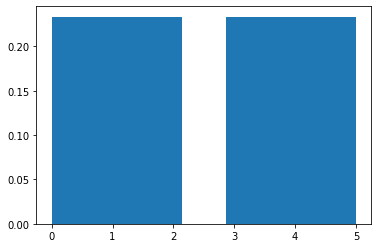

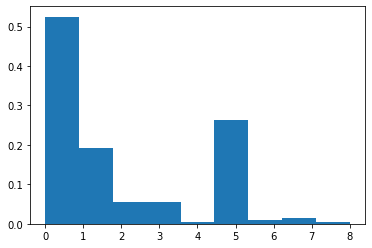

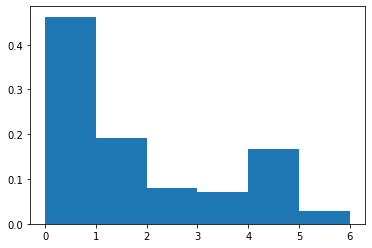

In [12]:
# CREATE HISTOGRAMS FOR EACH COLUMN
plt.hist(stardf2['Temperature'], density=True, bins=15)
plt.show()

plt.hist(stardf2['L'], density=True, bins=15)
plt.show()

plt.hist(stardf2['R'], density=True, bins=15)
plt.show()

plt.hist(stardf2['A_M'], density=True, bins=15)
plt.show()

plt.hist(stardf2['Type'], density=True, bins=7)
plt.show()

plt.hist(stardf['Color'], density=True, bins=9)
plt.show()

plt.hist(stardf['Spectral_Class'], density=True, bins=6)
plt.show()

In [13]:
# CREATE A CORRELATION MATRIX
c = stardf2.corr()
print(c)

             Temperature         L         R       A_M      Type
Temperature     1.000000  0.393404  0.064216 -0.420267  0.411129
L               0.393404  1.000000  0.526516 -0.692623  0.676845
R               0.064216  0.526516  1.000000 -0.608724  0.660975
A_M            -0.420267 -0.692623 -0.608724  1.000000 -0.955273
Type            0.411129  0.676845  0.660975 -0.955273  1.000000


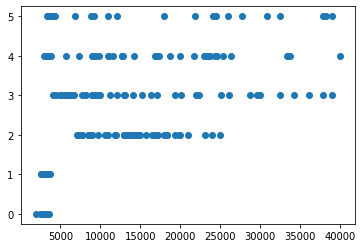

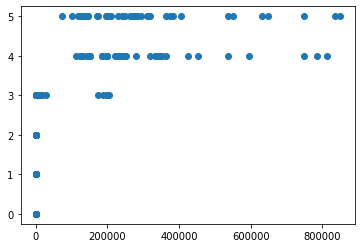

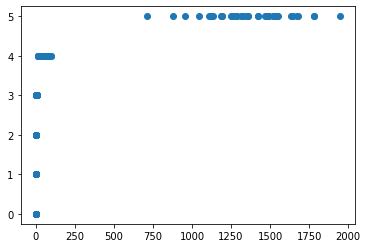

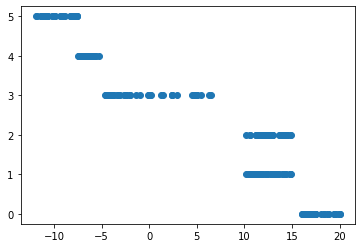

In [14]:
# CREATE SCATTERPLOTS FOR EACH VARIABLE AS WELL
plt.scatter(stardf2['Temperature'], stardf2['Type'])
plt.show()

plt.scatter(stardf2['L'], stardf2['Type'])
plt.show()

plt.scatter(stardf2['R'], stardf2['Type'])
plt.show()

plt.scatter(stardf2['A_M'], stardf2['Type'])
plt.show()

In [15]:
# FIND SUMMARY STATISTICS
print(stardf2.describe())

        Temperature              L            R         A_M        Type
count    240.000000     240.000000   240.000000  240.000000  240.000000
mean   10497.462500  107188.361375   237.157958    4.382375    2.500000
std     9552.425037  179432.245096   517.155683   10.532580    1.711394
min     1939.000000       0.000000     0.010000  -11.920000    0.000000
25%     3344.250000       0.000000     0.100000   -6.232500    1.000000
50%     5776.000000       0.075000     0.765000    8.315000    2.500000
75%    15055.500000  198050.000000    42.750000   13.697500    4.000000
max    40000.000000  849420.000000  1948.500000   20.060000    5.000000


In [16]:
# SPLIT DATA INTO TRAINING AND TEST SPLITS
y = stardf['Type']
X = stardf.drop('Type', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

[0.7166666666666667, 0.65, 0.7166666666666667, 0.6333333333333333, 0.65, 0.6, 0.5833333333333334, 0.5833333333333334, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5333333333333333, 0.55, 0.55, 0.5666666666666667, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.55, 0.5666666666666667, 0.55, 0.5833333333333334, 0.5833333333333334, 0.5666666666666667]


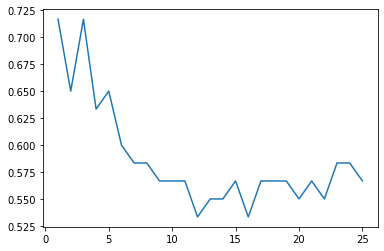

In [17]:
# DETERMINE OPTIMAL K
n_range = range(1,26)
scores = {}
scores_list = []
for n in n_range:
    k = KNeighborsClassifier(n_neighbors=n)
    k.fit(X_train, y_train)
    predictions = k.predict(X_test)
    scores[n] = sum(y_test == predictions) / len(y_test)
    scores_list.append(sum(y_test == predictions) / len(y_test))

print(scores_list)
plt.plot(n_range, scores_list)
plt.show()

In [18]:
#CREATE THE KNN MODEL
k = KNeighborsClassifier(n_neighbors=1)
k.fit(X_train, y_train)

# PREDICT
model_predictions = k.predict(X_train)
print(sum(y_train == model_predictions) / len(y_train))

predictions = k.predict(X_test)
print(sum(y_test == predictions) / len(y_test))

1.0
0.7166666666666667
